<a href="https://colab.research.google.com/github/angelomaia/alura-cursos/blob/master/Machine%20Learning%20-%20Classifica%C3%A7%C3%A3o%20KNN%20NB%20DT/Classifica%C3%A7%C3%A3o_KNN_NB_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv")

data.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [2]:
print(data.shape)
print(data.count())
print(data.describe())

(7043, 18)
Maior65Anos                7043
Conjuge                    7043
Dependentes                7043
MesesDeContrato            7043
TelefoneFixo               7043
VariasLinhasTelefonicas    7043
ServicoDeInternet          7043
SegurancaOnline            7043
BackupOnline               7043
SeguroNoDispositivo        7043
SuporteTecnico             7043
TVaCabo                    7043
StreamingDeFilmes          7043
TipoDeContrato             7043
PagamentoOnline            7043
FormaDePagamento           7043
ContaMensal                7043
Churn                      7043
dtype: int64
       Maior65Anos  MesesDeContrato  ContaMensal
count  7043.000000      7043.000000  7043.000000
mean      0.162147        32.371149    64.761692
std       0.368612        24.559481    30.090047
min       0.000000         0.000000    18.250000
25%       0.000000         9.000000    35.500000
50%       0.000000        29.000000    70.350000
75%       0.000000        55.000000    89.850000
max     

In [3]:
#modificação manual
traducao_dic = {
    'Sim':1,
    'Nao':0
}

data_mod = data[['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn']].replace(traducao_dic)
data_mod.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [4]:
#modificação auto pelo get dummies
dummy_data = pd.get_dummies(data.drop(['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn'],
                                      axis=1))

#adicionando dummy_data ao data_mod
final_data = pd.concat([data_mod,dummy_data], axis=1)

final_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [5]:
pd.set_option('display.max_columns', 39)

final_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


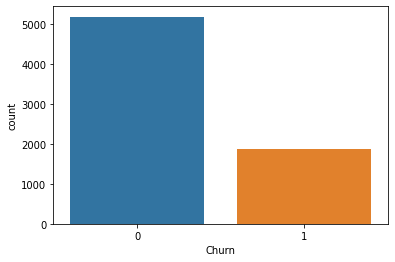

In [6]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=final_data)

In [7]:
#!pip install -U imbalanced-learn

# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = final_data.drop('Churn', axis = 1)
y = final_data['Churn']

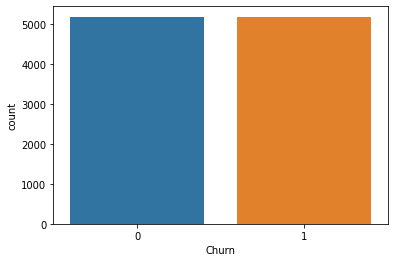

In [8]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [9]:
#Divisão inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [11]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

X_normalizado = norm.fit_transform(X)

X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

In [13]:
X_normalizado[0]
X_normalizado.shape

(10348, 38)

In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

In [ ]:
import numpy as np

a = Xmaria_normalizado

b = X_normalizado[0]

np.sum(np.square(a-b))

np.sqrt(91.70603225977928) #distância euclidiana de Maria pra X[0]

In [ ]:
import numpy as np

def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

#loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]            #subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    #exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   #raiz quadrada da soma anterior

    return distancias

calcula_distancia(X_normalizado, Xmaria_normalizado, 10)

In [15]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

### K-NearestNeighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')

knn.fit(X_treino, y_treino)

predito_knn = knn.predict(X_teste)

accuracy = (predito_knn == y_teste)

In [36]:
#print(accuracy.value_counts()[0])
print("A acurácia é de:", accuracy.value_counts()[1]/accuracy.shape)

575
A acurácia é de: [0.81481481]
